#Pendulo Simples
##Introdução
O problema do Pendulo Simples em Pequenos ângulos ($ \theta  < 0.2rad $), é possível de ser resolvido utilizando-se os métodos numéricos de Euler Explícito e Euler-Cromer, utilizando-se da linguagem python para as executar em prática.
##Solução Analítica
Partimos da equação do pêndulo:
$$ \frac{d^{2}x}{\text{d}t^2} = -g * sen(\theta)$$

Considerando que $x = l * \theta $, 
$$ \frac{d^{2}x}{\text{d}t^2} = l * \frac{d^{2}\theta}{\text{d}t^2}$$

chamando $\omega = \sqrt{\frac{g}{l}}$, chegamos a:

$$ \frac{d^{2}x}{\text{d}t^2} = \omega^2 * sin(\theta)$$

Aproximando para pequenos ângulos:
$$ \frac{d^{2}x}{\text{d}t^2} = \omega^2 * \theta$$

A solução é:

$$\theta = A + cos(\omega t + \sigma) $$

Considerando a posição inicial:
$$\theta (t = 0) = \theta_0 \rightarrow A = \theta_0$$
$$v (t = 0) = 0 \rightarrow \sigma = 0$$

Com isso chegamos a

$$\theta = \theta_0 * cos(\omega t)$$

e 

$$\frac{d\theta}{\text{d}t} = - \theta_0 * \omega^2 * sen(\omega t)$$

##Solução numérica
Usamos como base os valores: $g = 10 \frac{m}{s^2}, l = 10 m, \theta_0 = 0.1,$ e $ V_0 = 0$.
(Ver comparação no programa a baixo)

##Euler Explícito
$$\theta_n = \theta_{n-1} + V_{n-1} * \Delta{t}$$
$$V_n = V_{n-1} - \omega^2 * sen(\theta_{n-1})$$

##Euler-Cromer
$$\theta_n = \theta_{n-1} + V_{n-1} * \Delta t$$
$$V_n = V_{n-1} - \omega^2 * sen(\theta_{n})$$

#Resultados


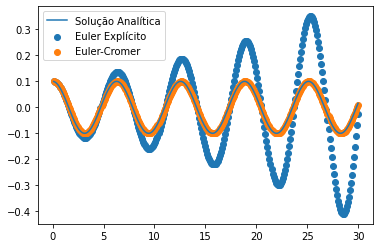

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

t=0
x0=0.1
v0=0
dt=0.1
w=1
g=10
l=10
tf = 30

xex_list,xcr_list, xan_list = [],[],[]
t_list = []

vex = v0
vcr = v0

xex = x0
xcr = x0
xan = x0


while(t < tf):
  t = t + dt 

  #Explicito
  xaux = xex
  xex = xex + vex * dt
  vex = vex - np.sin(xaux) * dt

  #Analitico
  xan= x0 * np.cos(w*t)
  van= -(w*w*np.cos(w*t)*dt)

  #Cromer
  xcr = xcr + vcr *dt
  vcr = vcr - np.sin(xcr) * dt

  xex_list.append(xex)
  xcr_list.append(xcr)
  xan_list.append(xan)
  t_list.append(t)

plt.plot(t_list,xan_list)
plt.scatter(t_list,xex_list)
plt.scatter(t_list,xcr_list)

plt.legend(["Solução Analítica", "Euler Explícito", "Euler-Cromer"])

plt.show()